<a href="https://colab.research.google.com/github/manthra16695/Code-360/blob/main/Manipal_Hospitals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data=pd.read_csv('/content/sample_data/Manipal_Train.csv')

In [2]:
data.head()

,SN,HospitalNo2,MaritalStatus,AgeYrs,Sex,BedCategory,Department,Estimatedcost,InsPayorcategory,State,Country,STATEZONE,CE_ACCESSIBILITY,CE_CSAT,CE_VALUEFORMONEY,EM_IMMEDIATEATTENTION,EM_NURSING,EM_DOCTOR,EM_OVERALL,AD_TIME,AD_TARRIFFPACKAGESEXPLAINATION,AD_STAFFATTITUDE,INR_ROOMCLEANLINESS,INR_ROOMPEACE,INR_ROOMEQUIPMENT,INR_ROOMAMBIENCE,FNB_FOODQUALITY,FNB_FOODDELIVERYTIME,FNB_DIETICIAN,FNB_STAFFATTITUDE,AE_ATTENDEECARE,AE_PATIENTSTATUSINFO,AE_ATTENDEEFOOD,DOC_TREATMENTEXPLAINATION,DOC_ATTITUDE,DOC_VISITS,DOC_TREATMENTEFFECTIVENESS,NS_CALLBELLRESPONSE,NS_NURSESATTITUDE,NS_NURSEPROACTIVENESS,NS_NURSEPATIENCE,OVS_OVERALLSTAFFATTITUDE,OVS_OVERALLSTAFFPROMPTNESS,OVS_SECURITYATTITUDE,DP_DISCHARGETIME,DP_DISCHARGEQUERIES,DP_DISCHARGEPROCESS,AdmissionDate,DischargeDate,LengthofStay,CE_NPS,NPS_Status
0,1,35236,Single,4.0,F,SPECIAL,PEDIATRIC,25000.0,PATIENT,Karnataka,INDIA,SOUTH,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2,4,2,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,7/18/2014,7/21/2014,3,9,Promotor
1,2,35237,Single,13.0,F,SPECIAL,PEDIATRIC,15000.0,PATIENT,Karnataka,INDIA,SOUTH,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,7/11/2014,7/16/2014,5,10,Promotor
2,3,35234,Married,33.0,F,SEMISPECIAL,GYNAEC,70000.0,EXEMPTION,Karnataka,INDIA,SOUTH,3,2,2,4,4,4,4,3,3,4,3,3,3,3,2,3,3,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4,3,4,3,6/17/2014,7/20/2014,33,7,Passive
3,4,35232,Married,51.0,F,SPECIAL,GYNAEC,150000.0,PATIENT,West Bengal,INDIA,EAST,4,4,3,4,4,4,4,4,4,4,3,4,4,3,3,4,4,4,3,4,3,4,4,4,4,4,4,3,4,4,3,3,3,4,3,7/16/2014,7/22/2014,6,10,Promotor
4,5,35233,Married,31.0,F,SPECIAL,GYNAEC,100000.0,INSURANCE,Karnataka,INDIA,SOUTH,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,7/13/2014,7/16/2014,3,10,Promotor


In [3]:
data.isnull().sum()

SN                                0
HospitalNo2                       0
MaritalStatus                     0
AgeYrs                            0
Sex                               0
BedCategory                       0
Department                        0
Estimatedcost                     0
InsPayorcategory                  0
State                             0
Country                           0
STATEZONE                         0
CE_ACCESSIBILITY                  0
CE_CSAT                           0
CE_VALUEFORMONEY                  0
EM_IMMEDIATEATTENTION             0
EM_NURSING                        0
EM_DOCTOR                         0
EM_OVERALL                        0
AD_TIME                           0
AD_TARRIFFPACKAGESEXPLAINATION    0
AD_STAFFATTITUDE                  0
INR_ROOMCLEANLINESS               0
INR_ROOMPEACE                     0
INR_ROOMEQUIPMENT                 0
INR_ROOMAMBIENCE                  0
FNB_FOODQUALITY                   0
FNB_FOODDELIVERYTIME        

In [4]:
data=data.drop(['SN','HospitalNo2'],axis=1)


In [5]:
catlist=['Sex','BedCategory','Department','InsPayorcategory','State','Country','STATEZONE']
numlist=['AgeYrs','Estimatedcost','LengthofStay','CE_NPS']

for i in numlist:
  data[i]=data[i].astype('int')




In [6]:
##To Segregate Numeric and Categorical variables
ls=list(data.columns.values)

for i in ls:
  if i in numlist:
    ls.remove(i)

In [7]:
for i in ls:
  data[i]=data[i].astype('object')
# data['MaritalStatus']=data['MaritalStatus'].astype('category')

In [8]:
data['AdmissionDate']=pd.to_datetime(data['AdmissionDate'])
data['DischargeDate']=pd.to_datetime(data['DischargeDate'])

In [9]:
import numpy as np

for columns in ls:
  unique_vals=np.unique(data[columns])
  nr_value=len(unique_vals)
  if nr_value<20:
    print('The Number of values for feature {} is {} and the unique values are {}'.format(columns,nr_value, unique_vals))

The Number of values for feature MaritalStatus is 5 and the unique values are ['Divorced' 'Married' 'Separated' 'Single' 'Widowed']
The Number of values for feature Sex is 2 and the unique values are ['F' 'M']
The Number of values for feature BedCategory is 11 and the unique values are ['CCU' 'DAYCARE' 'GENERAL' 'GENERAL HD' 'ITU' 'Renal ICU' 'SEMISPECIAL'
 'SEMISPECIAL HD' 'SPECIAL' 'ULTRA DLX' 'ULTRA SPL']
The Number of values for feature Department is 7 and the unique values are ['CARDIOLOGY' 'GEN' 'GYNAEC' 'ORTHO' 'PEDIATRIC' 'RENAL' 'SPECIAL']
The Number of values for feature InsPayorcategory is 5 and the unique values are ['CORPORATE' 'EXEMPTION' 'INSURANCE' 'INTERNATIONAL' 'PATIENT']
The Number of values for feature STATEZONE is 7 and the unique values are ['CENTRAL' 'EAST' 'INTERNATIONAL' 'NORTH' 'SOUTH' 'Unknown' 'WEST']
The Number of values for feature CE_ACCESSIBILITY is 4 and the unique values are [1 2 3 4]
The Number of values for feature CE_CSAT is 4 and the unique values

In [13]:
##One hot encoding for categorical variable with 
# data=pd.get_dummies(data,columns=['MaritalStatus','Sex','BedCategory','Department','InsPayorcategory','STATEZONE'])



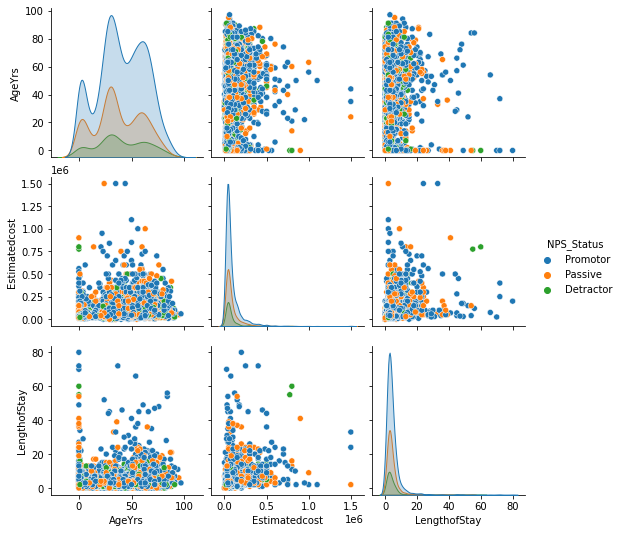

In [10]:
##Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

numericaldata=data[['AgeYrs','Estimatedcost','LengthofStay','NPS_Status']]
sns.pairplot(numericaldata,hue='NPS_Status')


In [11]:
data.dtypes

MaritalStatus                             object
AgeYrs                                     int64
Sex                                       object
BedCategory                               object
Department                                object
Estimatedcost                              int64
InsPayorcategory                          object
State                                     object
Country                                   object
STATEZONE                                 object
CE_ACCESSIBILITY                          object
CE_CSAT                                   object
CE_VALUEFORMONEY                          object
EM_IMMEDIATEATTENTION                     object
EM_NURSING                                object
EM_DOCTOR                                 object
EM_OVERALL                                object
AD_TIME                                   object
AD_TARRIFFPACKAGESEXPLAINATION            object
AD_STAFFATTITUDE                          object
INR_ROOMCLEANLINESS 

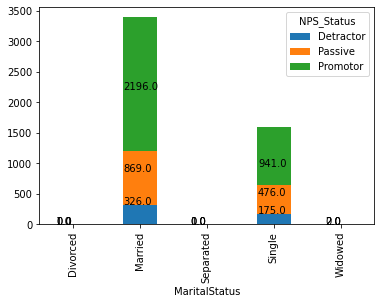

In [17]:
## Factor Vs Factor Marital Status and NPS_Status

crosstb=pd.crosstab(data['MaritalStatus'],data['NPS_Status'])

# crosstb=pd.crosstab(data['MaritalStatus'],data['NPS_Status']).apply(lambda r: r/r.sum(), axis=1)
ax=crosstb.plot(kind='bar',stacked=True,label=True)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [13]:
##Chisquared test to check for significance
from scipy import stats 

c,p,dof,expected=stats.chi2_contingency(crosstb)
p
##Yes there is significance between Marital Status and NPS_Status

0.0011860281607372464

In [16]:
crosstb ##64% of Married people seems to like the hospital and are Promotors compared to Singles whiere 59% are promotors

NPS_Status,Detractor,Passive,Promotor
MaritalStatus,,,
Divorced,1.000000,0.000000,0.000000
Married,0.096137,0.256267,0.647597
Separated,0.000000,0.000000,1.000000
Single,0.109925,0.298995,0.591080
Widowed,0.000000,0.500000,0.500000


In [33]:

count=0
a=[]
for i in ls:
  
  crosstb=pd.crosstab(data[i],data['NPS_Status'])
  c,p,dof,expected = stats.chi2_contingency(crosstb)

  if p <  0.05:
    count+=1
    print('{}Yes! This variable {} has significance with 95% conf with p-value as {} '.format(count,i,p))
  else:
    a.append(i)
##Seems like 45 variables out of 47 have significance at 90% confidence 
##Will perform EDA and Bi-Variate Analysis

1Yes! This variable MaritalStatus has significance with 95% conf with p-value as 0.0011860281607372464 
2Yes! This variable Sex has significance with 95% conf with p-value as 0.026911887890060066 
3Yes! This variable BedCategory has significance with 95% conf with p-value as 1.3572007100465888e-08 
4Yes! This variable Department has significance with 95% conf with p-value as 4.531334897059869e-07 
5Yes! This variable InsPayorcategory has significance with 95% conf with p-value as 4.076085776662428e-13 
6Yes! This variable State has significance with 95% conf with p-value as 8.179670103489967e-05 
7Yes! This variable Country has significance with 95% conf with p-value as 0.02084693233898609 
8Yes! This variable STATEZONE has significance with 95% conf with p-value as 6.226207775935155e-07 
9Yes! This variable CE_ACCESSIBILITY has significance with 95% conf with p-value as 8.531344167530348e-181 
10Yes! This variable CE_CSAT has significance with 95% conf with p-value as 0.0 
11Yes! This

In [34]:
count=0
b=[]
for i in numlist:
  
  Promotor=data[i][data['NPS_Status']=='Promotor']
  Passive=data[i][data['NPS_Status']=='Passive']
  Detractor=data[i][data['NPS_Status']=='Detractor']
  p_value=stats.f_oneway(Promotor,Passive,Detractor)
  print(p_value,i)
##Seems like all the int variables are significant based on ANOVA  

F_onewayResult(statistic=9.934319804713269, pvalue=4.944850823584424e-05) AgeYrs
F_onewayResult(statistic=3.623065193319743, pvalue=0.0267710272383185) Estimatedcost
F_onewayResult(statistic=3.9483229407524707, pvalue=0.019347353619054385) LengthofStay
F_onewayResult(statistic=10969.497611099176, pvalue=0.0) CE_NPS


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


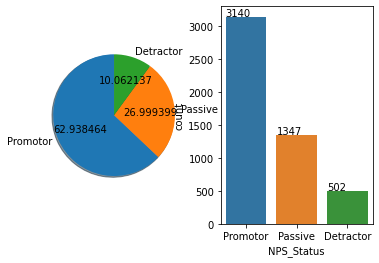

In [115]:
##Target Value Distribution

plt.figure()
plt.subplot(1,2,1)
plt.pie(data['NPS_Status'].value_counts(),autopct='%3f',startangle=90,labels=['Promotor','Passive','Detractor'],shadow=True)


plt.subplot(1,2,2)
cv=sns.countplot(data['NPS_Status'])
for p in cv.patches:
    cv.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# # plt.subplot(data['NPS_Status'])
# plt.pie(data['NPS_Status'].value_counts(),autopct='%3f',startangle=90,labels=['Promotor','Passive','Detractor'],shadow=True)
# sns.countplot(x=data['NPS_Status'],ax=1)

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
# axes[0].plt.pie(data['NPS_Status'].value_counts(),autopct='%3f',startangle=90,labels=['Promotor','Passive','Detractor'],shadow=True)
# axes[1].plt.pie(data['NPS_Status'].value_counts(),autopct='%3f',startangle=90,labels=['Promotor','Passive','Detractor'],shadow=True)
# fig.tight_layout()

# fig, ax =plt.subplots(1,2)
# sns.countplot(data['NPS_Status'], ax=ax[0])
# sns.barplot(data['NPS_Status'].count(), ax=ax[1])
# fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



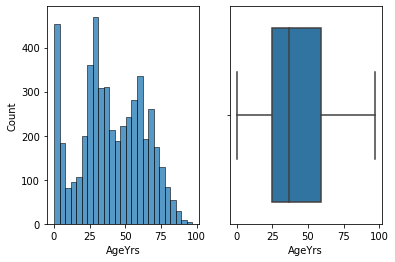

In [149]:
##Age Years and Target

plt.figure()
plt.subplot(1,2,1)
sns.histplot(data['AgeYrs'])

# plt.subplot(1,2,2)
# sns.distplot(data['AgeYrs'])

plt.subplot(1,2,2)
sns.boxplot(data['AgeYrs'])

In [139]:
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=data['AgeYrs']))

loss_90th=data['AgeYrs'].quantile(0.90)
loss_10th=data['AgeYrs'].quantile(0.10)

fig.add_shape(
        go.layout.Shape(type='line', xref='x',
                        x0=loss_90th, y0=0,x1=loss_90th,y1=300, line=dict(
        color="black",
        width=1,
    ))
)

fig.add_shape(
        go.layout.Shape(type='line', xref='x',
                        x0=loss_10th, y0=0,x1=loss_10th,y1=300, line=dict(
        color="black",
        width=1,
    ))
)
##80 % of patients are from Age 5 to 70
##Most likely age range is between 20-40